In [52]:
##1
import numpy as np
import tensorflow as tf
array1=np.asarray([6.3,7.2,8.5,9.7,15])
array2=np.asarray([1.69,11.5,15,14.2,16])
x = tf.constant(array1,dtype = tf.float32)
y = tf.constant(array2,dtype = tf.float32)
sess=tf.Session()
print( sess.run(x))
sess=tf.Session()
print( sess.run(y))


[  6.30000019   7.19999981   8.5          9.69999981  15.        ]
[  1.69000006  11.5         15.          14.19999981  16.        ]


In [5]:
##2
m1=tf.reduce_mean(x)
with tf.Session() as sess:
    output = sess.run(m1)
    print("Mean of x is",output)
m2=tf.reduce_mean(y)
with tf.Session() as sess:
    output = sess.run(m2)
    print("Mean of y is",output)

Mean of x is 9.34
Mean of y is 11.678


In [6]:
##3
sub=tf.subtract(m1,x)
with tf.Session() as sess:
    output = sess.run(sub)
    print(output)

[ 3.03999996  2.14000034  0.84000015 -0.35999966 -5.65999985]


In [7]:
sqr=tf.square(sub)
with tf.Session() as sess:
    output = sess.run(sqr)
    print(output)

[  9.24160004   4.57960129   0.70560026   0.12959975  32.03559875]


In [8]:
var=tf.reduce_sum(sqr)
with tf.Session() as sess:
    output = sess.run(var)
    print(output)

46.692


In [11]:
##3 in simplified way.

mean,var = tf.nn.moments(x, axes=[0])
with tf.Session() as sess:
    output = sess.run(mean)
    output2=sess.run(var)
    print("Mean of x is ",output)
    print("Variance of  is ",output2)


Mean of x is  9.34
Variance of  is  9.3384


In [12]:
## 4
xi=tf.subtract(x,m1)
with tf.Session() as sess:
    output = sess.run(xi)
    print(output)

[-3.03999996 -2.14000034 -0.84000015  0.35999966  5.65999985]


In [13]:
yi=tf.subtract(y,m2)
with tf.Session() as sess:
    output = sess.run(yi)
    print(output)

[-9.98799896 -0.1779995   3.3220005   2.52200031  4.3220005 ]


In [14]:
prod=tf.multiply(xi,yi)
with tf.Session() as sess:
    output = sess.run(prod)
    print(output)

[ 30.36351585   0.38091898  -2.79048085   0.90791923  24.46252251]


In [20]:
num=tf.reduce_sum(prod)
with tf.Session() as sess:
    output = sess.run(num)
    print(output)
    
den=len(array1)-1


covar=tf.divide(num,den)
with tf.Session() as sess:
    output = sess.run(covar)
    print("Covariance is",output)

53.3244
Covariance is 13.3311


In [18]:
## 5

m=tf.divide(covar,var)
with tf.Session() as sess:
    output = sess.run(m)
    print("The value of m is ",output)

The value of m is  1.14205


In [19]:
## 6

h=tf.multiply(m,m1)
c=tf.subtract(m2,h)
with tf.Session() as sess:
    output = sess.run(c)
    print("The value of c is ",output)


The value of c is  1.01129


# Part 2

Epoch: 0045 cost= 40.110321045 W= 0.432156 b= -0.137853
Epoch: 0090 cost= 13.166956902 W= 0.907739 b= -0.0907967
Epoch: 0135 cost= 8.523145676 W= 1.10498 b= -0.0707209
Epoch: 0180 cost= 7.721074581 W= 1.18676 b= -0.0618383
Epoch: 0225 cost= 7.581805229 W= 1.22063 b= -0.0575997
Epoch: 0270 cost= 7.557277679 W= 1.23462 b= -0.0552881
Epoch: 0315 cost= 7.552778721 W= 1.24038 b= -0.0537765
Epoch: 0360 cost= 7.551840305 W= 1.24271 b= -0.0525972
Epoch: 0405 cost= 7.551567078 W= 1.24363 b= -0.0515562
Epoch: 0450 cost= 7.551423073 W= 1.24395 b= -0.0505732
Epoch: 0495 cost= 7.551315308 W= 1.24403 b= -0.0496146
Epoch: 0540 cost= 7.551213264 W= 1.24402 b= -0.0486666
Epoch: 0585 cost= 7.551115513 W= 1.24395 b= -0.0477236
Epoch: 0630 cost= 7.551017761 W= 1.24388 b= -0.046783
Epoch: 0675 cost= 7.550920963 W= 1.24379 b= -0.0458439
Epoch: 0720 cost= 7.550824642 W= 1.2437 b= -0.0449061
Epoch: 0765 cost= 7.550729275 W= 1.24361 b= -0.0439689
Epoch: 0810 cost= 7.550633430 W= 1.24352 b= -0.0430327
Epoch: 08

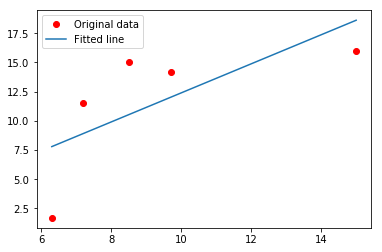

In [57]:
n_samples = len(array1)
X = tf.placeholder("float")
Y = tf.placeholder("float")
import numpy as np
rng = np.random
learning_rate = 0.0002
training_epochs = 1000
display_step = 45
import matplotlib.pyplot as plt

# Set model weights
W = tf.Variable(rng.randn(), name="wt")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (p, r) in zip(array1, array2):
            sess.run(optimizer, feed_dict={X: p, Y: r})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: array1, Y:array2})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: array1, Y: array2})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    
    plt.plot(array1, array2, 'ro', label='Original data')
    plt.plot(array1, sess.run(W) * array1 + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
